<a href="https://colab.research.google.com/github/shivesh-ranjan/Neural-Networks-vs-Core-ML-for-Regression/blob/main/TF_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression using Tensorflow on Structured Data
### Dataset: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=tf.keras.metrics.mae)

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8637.1006 - mean_absolute_error: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7759 - mean_absolute_error: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1470 - mean_absolute_error: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7792.0225 - mean_absolute_error: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7748.3887 - mean_absolute_error: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7595.3945 - mean_absolute_error: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7589.9844 - mean_absolute_error: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7698.5586 - mean_absolute_error: 7698.5586
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss:

In [12]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mean_absolute_error: 7023.3291


[7023.3291015625, 7023.3291015625]

# Improving Model through Experimentation

In [14]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = tf.keras.metrics.mae)

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mean_absolute_error: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.4287 - mean_absolute_error: 13104.4287
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5400 - mean_absolute_error: 12749.5400
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mean_absolute_error: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mean_absolute_error: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9457.7188 - mean_absolute_error: 9457.7188
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6533 - mean_absolute_error: 8147.6533
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7528.8398 - mean_absolute_error: 7528.8398
Epoch 9/100
34/34 [==============================] - 0s 3ms/st

In [15]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.5107 - mean_absolute_error: 4924.5107


[4924.5107421875, 4924.5107421875]

In [18]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=tf.keras.metrics.mae)

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mean_absolute_error: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4287 - mean_absolute_error: 13104.4287
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5400 - mean_absolute_error: 12749.5400
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mean_absolute_error: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mean_absolute_error: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7188 - mean_absolute_error: 9457.7188
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6533 - mean_absolute_error: 8147.6533
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7528.8398 - mean_absolute_error: 7528.8398
Epoch 9/200
34/34 [==============================] - 0s 3ms/st

In [19]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3494.5322 - mean_absolute_error: 3494.5322


[3494.5322265625, 3494.5322265625]

## Plotting the training curve of 3rd model:

Text(0.5, 0, 'epochs')

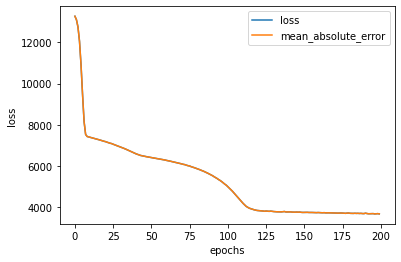

In [20]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing Data
Normalisation and Standardization

In [21]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y= insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [27]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [32]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=tf.keras.metrics.mae)

history = insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6494 - mean_absolute_error: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.4795 - mean_absolute_error: 13333.4795
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mean_absolute_error: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mean_absolute_error: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13189.5850 - mean_absolute_error: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4482 - mean_absolute_error: 13066.4482
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mean_absolute_error: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mean_absolute_error: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 

In [33]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mean_absolute_error: 3438.7844


[3438.784423828125, 3438.784423828125]

# Comparison with XGBoost

In [60]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
test_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
test_model.fit(X_train_normal, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test_normal, y_test)],
             verbose=False)
test_predictions = test_model.predict(X_test_normal)
test_mae = mean_absolute_error(test_predictions, y_test)
print("Mean Absolute Error:" , test_mae)

[05:38:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 2396.755427527314


## Improving XGBoost model

In [84]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
test_model = XGBRegressor(n_estimators=2900, learning_rate=0.001)
test_model.fit(X_train_normal, y_train, 
             early_stopping_rounds=10, 
             eval_set=[(X_test_normal, y_test)],
             verbose=False)
test_predictions = test_model.predict(X_test_normal)
test_mae = mean_absolute_error(test_predictions, y_test)
print("Mean Absolute Error:" , test_mae)

[05:45:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 2230.096499092584


# Conclusion:
For Structured Data, traditional ml algorithms may work better than neural networks!